## Objective
The Waze data analytics team is developing a project to analyze data and reduce the monthly churn rate of users. In this project, the term "churn" refers to users who uninstall the app.
The scope of this notebook is to analyze the provided data and create visualizations to aid in making decisions for the subsequent stages of the project.

The first step in our analysis will be to import the libraries we’ll use, load the file containing the data to be analyzed, and review the specific characteristics of the loaded data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

In [3]:
print('First 10 rows')
df.head(10)

First 10 rows


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
print('Dataframe size (columns by rows)')
df.size

Dataframe size (columns by rows)


194987

In [5]:
print('Descriptive statistics')
df.describe()

Descriptive statistics


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [6]:
print('General information')
df.info()

General information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB

## Visualizations
Once we have a general idea of what our dataframe looks like, we will proceed to create visualizations to help us identify trends or variables of interest.

Since we will create multiple visualizations with the same structure and to make the notebook easier to read, we will define functions to display histograms and box plots.

In [7]:
def print_boxplot(field):
    plt.figure(figsize=(6,1))
    sns.boxplot(x=df[field], fill=False, width=.5, linewidth=1.5, fliersize=.1, flierprops={"marker": "."})
    plt.title(f'{field} box plot');

In [8]:
def histogrammer(column_str, median_text=True, fill_text=False, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(6,3))
    ax = sns.histplot(x=df[column_str], fill=fill_text, **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

### sessions
_The number of occurrences of a user opening the app during the month_

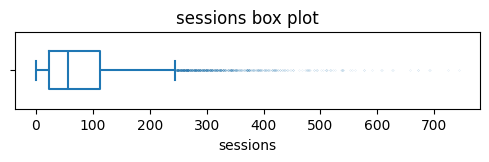

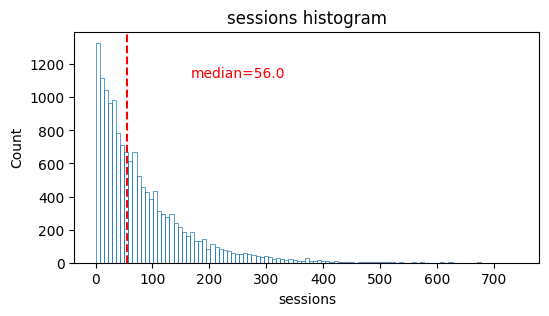

In [9]:
print_boxplot('sessions')
histogrammer('sessions')

The graph shows a right-skewed distribution. Half of the users logged in 56 or fewer times during the last month, although some users logged in more than 700 times.

### drives
_An occurrence of driving at least 1 km during the month_

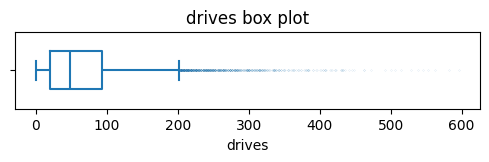

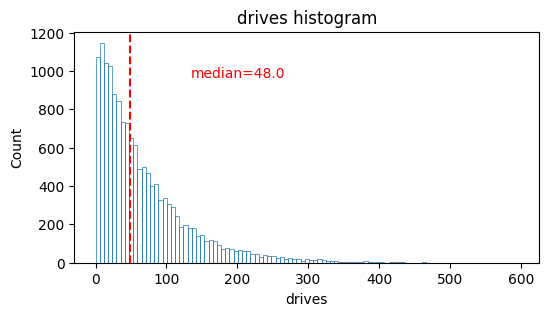

In [10]:
print_boxplot('drives')

histogrammer('drives')

The graph shows a right-skewed distribution. Half of the users drove 48 kilometers or fewer during the past month, although some users drove more than 400 kilometers.

### total_sessions
_A model estimate of the total number of sessions since a user has onboarded_

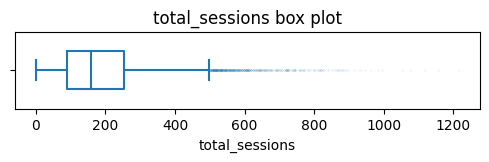

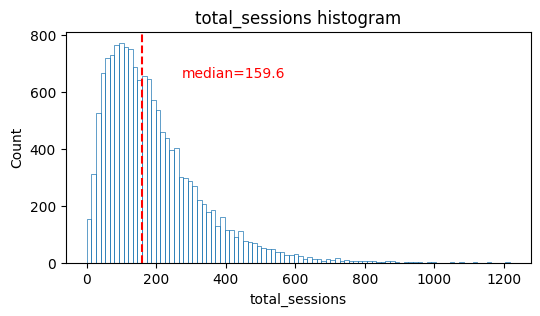

In [11]:
print_boxplot('total_sessions')

histogrammer('total_sessions')

The graph shows a right-skewed distribution. Users have a median of 159.6 total sessions, and considering that the median for the last month is 56 sessions, this means many users started about a third of their sessions in the past month. It might be interesting to explore this trend further.

### n_days_after_onboarding
_The number of days since a user signed up for the app_

Median: 1741.0


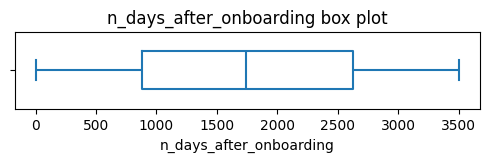

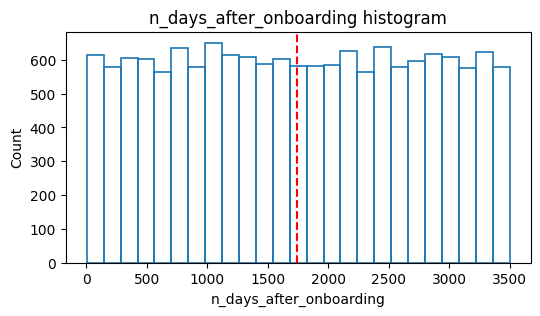

In [12]:
print_boxplot('n_days_after_onboarding')

histogrammer('n_days_after_onboarding', median_text=False)

The visualization shows a normal distribution, with approximately 600 users on each day between 0 and 3500, which would be around 9.5 years.

### driven_km_drives
_Total kilometers driven during the month_

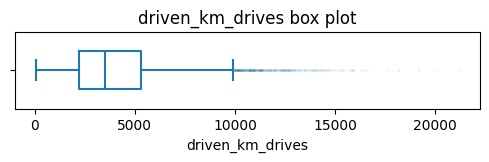

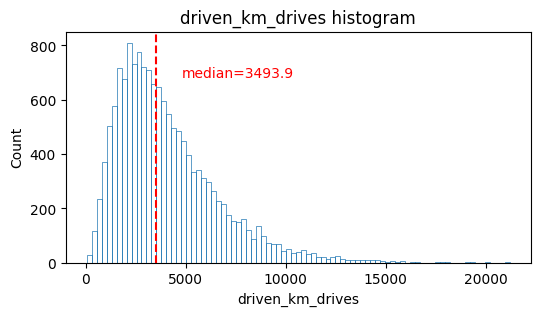

In [13]:
print_boxplot('driven_km_drives')

histogrammer('driven_km_drives', median_text=True)

The graph shows a right-skewed distribution, with half of the users driving under 3500 km in the past month, and some users driving more than 15,000 km—around 500 km per day, every day.

### duration_minutes_drives
_Total duration driven in minutes during the month_

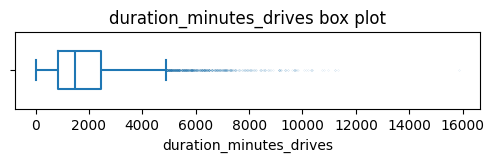

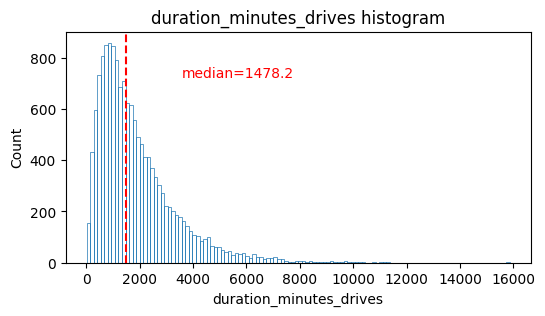

In [14]:
print_boxplot('duration_minutes_drives')

histogrammer('duration_minutes_drives', median_text=True)

The duration_minutes_drives variable has a heavily skewed right tail. Half of the users drove less than ~1,478 minutes (~25 hours), but some users clocked over 250 hours over the month.

### activity_days
_Number of days the user opens the app during the month_

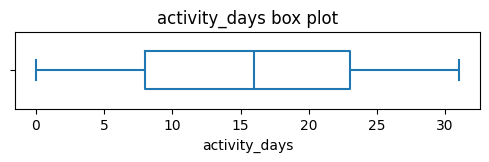

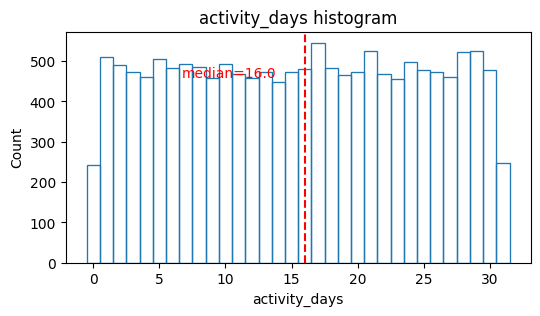

In [15]:
print_boxplot('activity_days')

histogrammer('activity_days', median_text=True, discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution, with around 500 people opening the app on each day. However, approximately 250 people did not open the app at all, while another 250 opened it every day of the month.

### driving_days
_Number of days the user drives (at least 1 km) during the month_

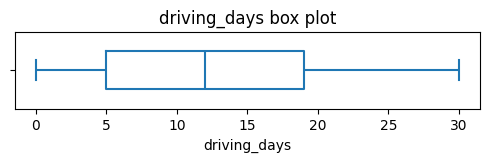

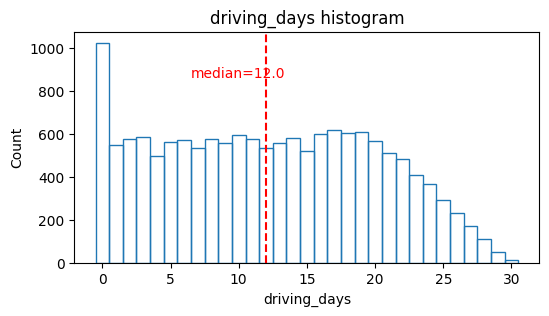

In [16]:
print_boxplot('driving_days')

histogrammer('driving_days', median_text=True, discrete=True)

Users drive a relatively consistent ~600 km between 1 and 20 days, with a decline starting from day 21. Up to a certain point, there is a correlation with activity_days. It's noteworthy that while around 250 users did not log in last month, nearly 1000 users did not drive a single kilometer. Additionally, about 250 users drove every day.

### device
_The type of device a user starts a session with_

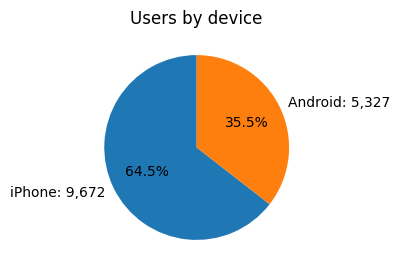

In [17]:
fig = plt.figure(figsize=(3, 3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]:,}',
                f'{data.index[1]}: {data.values[1]:,}'],
        autopct='%1.1f%%', startangle=90
        )
plt.title('Users by device');

64.5% of the users in the dataset use iPhone devices, while Android users represent 35.5%.

### label
_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

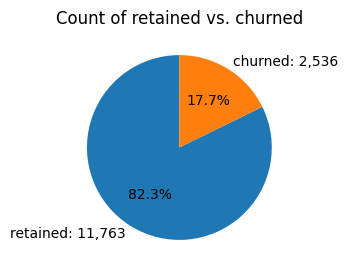

In [18]:
fig = plt.figure(figsize=(3, 3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]:,}',
                f'{data.index[1]}: {data.values[1]:,}'],
        autopct='%1.1f%%', startangle=90
        )
plt.title('Count of retained vs. churned');

Less than 18% of the users churned.

### driving_days vs. activity_days
Since the values for driving_days and activity_days are related, as they represent a parameter for each day of the month, it makes sense to plot them in a single chart to observe their behavior.

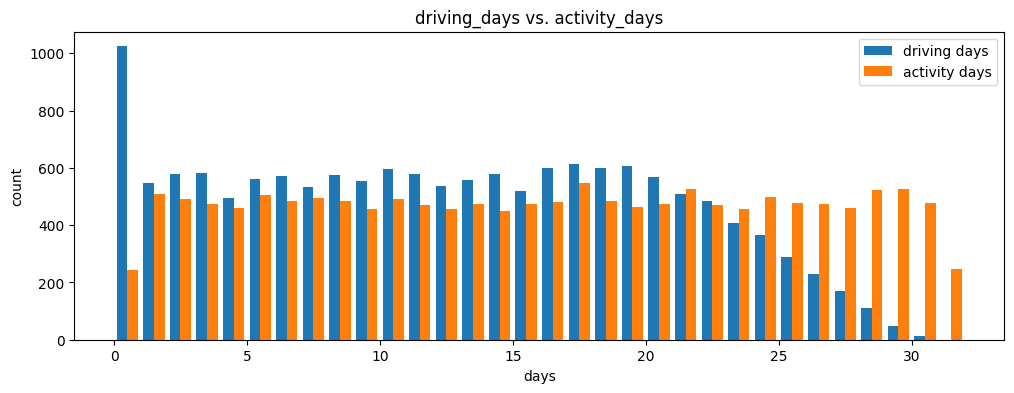

In [19]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label, fill=True)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

The graph more clearly shows what was observed previously and reveals that, although these two parameters may seem to go hand in hand, they do not necessarily do so.

We can hypothesize that some users open the app to check their profile, review traffic, or by mistake, and that such sessions are not reflected in the metric measuring driving days. This is just a hypothesis, and a deeper analysis should be conducted to confirm it. For that, more information will be needed. 

Another insight from the graph is the difference in the number of days data was collected for each metric.

In [20]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


By obtaining the maximum value for `driving_days` and `activity_days`, we confirm that there is a difference in the number of days each metric collected data. 

There is a possibility that no user drives every day of the month, although it is unlikely in a dataset of 15,000 users.

To better visualize this, we can plot them together in a scatter plot.

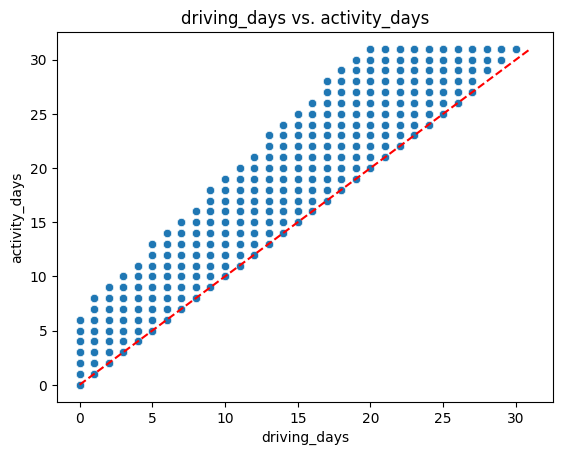

In [21]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

### Retention by device
Histogram with four bars, each representing a different device-label combination, to show the number of iPhone and Android users who were retained or churned.

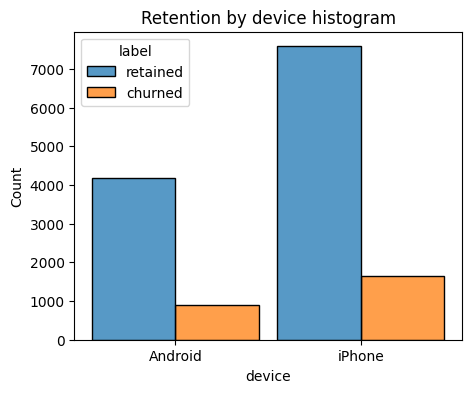

In [22]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

### Retention by kilometers driven per driving day
To visualize the kilometers driven per day, we need to create a new column using `driven_km_drives` and `driving_days`. In the process, we must ensure there are no errors or infinite values from dividing by zero.

In [23]:
# Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value recorded is 15,420 kilometers per driving day, which is physically impossible. For example, driving at 100 km per hour for 12 hours only covers 1,200 km. It's unlikely that many people averaged more than this each day they drove, so for now, we'll exclude any rows where the distance in this column exceeds 1,200 km.

Next, we plot a histogram for the new 'km_per_driving_day' column, excluding users with values greater than 1,200 km. Each bar should be the same width and feature two colors: one color representing the percentage of users in that bar who churned, and the other representing the percentage who were retained.

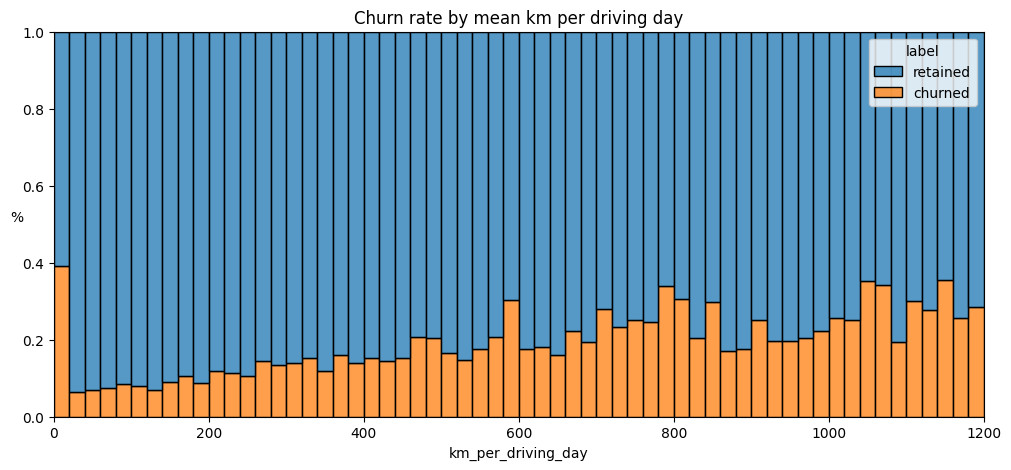

In [24]:
# Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The graph shows that nearly 40% of the users who did not drive any kilometers ended up as churned. Regardless of that, we can see that as more kilometers are driven, the percentage of users who choose to churn increases.

### Churn rate per number of driving days
Now we will repeat the exercise, but this time using the `driving_days` column.

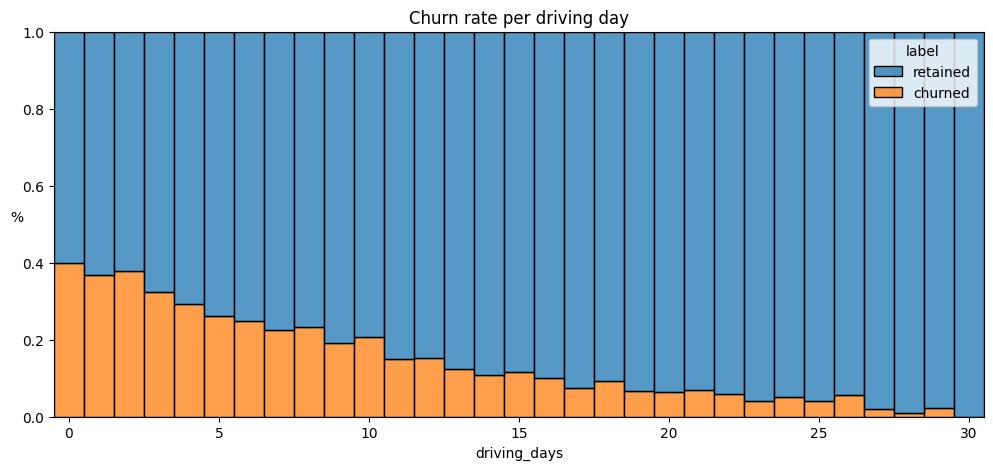

In [25]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

As expected, as users drive more days, the percentage of churned users decreases.

### Proportion of sessions that occurred in the last month
Create a new column percent_sessions_in_last_month that represents the percentage of each user's total sessions that were logged in their last month of use.

In [26]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_last_month'].median()

np.float64(0.42309702992763176)

Median: 0.4


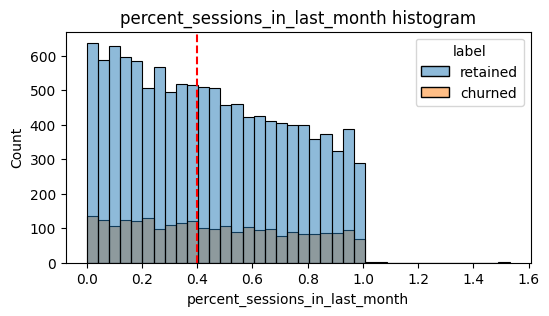

In [27]:
# Histogram
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False, fill_text=True)

In [28]:
df['n_days_after_onboarding'].median()

np.float64(1741.0)

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

To visualize this, we will create a histogram of 'n_days_after_onboarding' for users who had 40% or more of their total sessions in the last month.

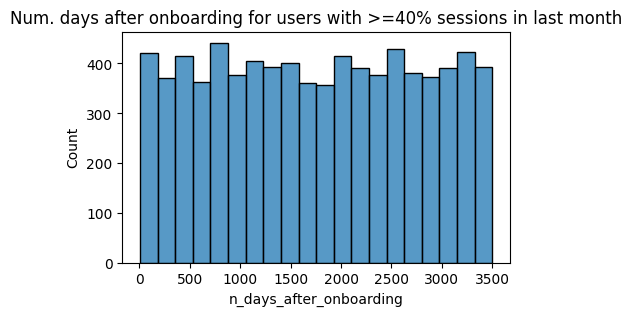

In [29]:
# Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.